# <center>  Watson Visual Recognition in Python
## <center> [CognitiveClass.ai](http://cognitivecalss.ai)

### Table of contents
1. watson_developer_cloud package
2. Getting your Watson Visual Recognition API Key
3. Detecting Faces with Watson
4. Classifying objects with Watson
5. Creating custom image classifiers

## [IBM Watson APIs](https://cocl.us/mI2qq):
- [**Visual Recognition**](https://cocl.us/watsonvr_dsbootcampukr) ([API docs](https://cocl.us/watsonvrapidoc), [GUI](https://cocl.us/watsonvrtool))
- [Conversation](https://cocl.us/watsonchatbot) (Chatbots)
- [Language translator](https://cocl.us/watsontranslator)
- [Speech to Text](https://cocl.us/watsonstt)
- [Text to Speech](https://cocl.us/watsontts)
- ... and [more](https://cocl.us/watsonservices)

Github: https://github.com/watson-developer-cloud

#### Import libraries

In [2]:
from pprint import pprint
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import cv2
from pylab import rcParams
import imutils

from ibm_watson import VisualRecognitionV3, ApiException
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

%matplotlib inline

In [3]:

def plt_show(image, title="", size = (12,10)):
    #function to plot images cleanly
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rcParams['figure.figsize'] = size[0], size[1]
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

## How to get your own [Watson Visual Recognition API Key](https://cocl.us/watsonvr):

1. Create free account at IBM Cloud and get free access to it via [IBM Academic Initiative](https://my15.digitalexperience.ibm.com/b73a5759-c6a6-4033-ab6b-d9d4f9a6d65b/dxsites/151914d1-03d2-48fe-97d9-d21166848e65/home) or via https://cloud.ibm.com/registration/


2. Login to IBM Cloud and navigate to Watson AI/ML Services page in Catalog https://cloud.ibm.com/catalog?category=ai#services 
![Watson Services on IBM Cloud](http://analytics.romanko.ca/images/IBM_Cloud_AI_services.png "Watson Services on IBM Cloud")


3. In the IBM Cloud catalog, find the **Visual Recognition service** under the "AI / Machine Learning" category, and then click "Create"


4. Once you have created the service, you can now access it via your dashboard: [https://cloud.ibm.com/dashboard/](https://cloud.ibm.com/resources)


5. To get your API Key, follow the instructions in the screenshot below. Go to "Service credentials", click to expand "Auto-generated service credentials" and copy apikey to this Python notebook.
![Speech to Text Watson service on IBM Cloud](http://analytics.romanko.ca/images/IBM_Cloud_Speech_to_Text2.png "Speech to Text Watson service on IBM Cloud")

#### Read in Watson Visual Recognition API key

In [20]:
# Choose one:

# with open('watson_api.txt', 'r') as f:
#     api_key = f.read() 

### or

api_key = os.environ['IBM_API_KEY']  # or pass your api key as string
authenticator = IAMAuthenticator(api_key) 

In [21]:
#latest version of the Watson Visual Recognition service
latest_version = "2016-05-20" 

In [22]:
#Instantiate the Visual Recognition service in Python
sdk_vr = VisualRecognitionV3('2016-05-20', authenticator=authenticator)

### Detecting faces

#### Download image

In [23]:
import urllib
    
# url = "https://upload.wikimedia.org/wikipedia/commons/7/76/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"

url = "https://pbs.twimg.com/media/DB5814aU0AA2_Wb.jpg"
name = "trumptrudeau.jpg"

urllib.request.urlretrieve(url, name)

('trumptrudeau.jpg', <http.client.HTTPMessage at 0x7f804c8948e0>)

#### Display image

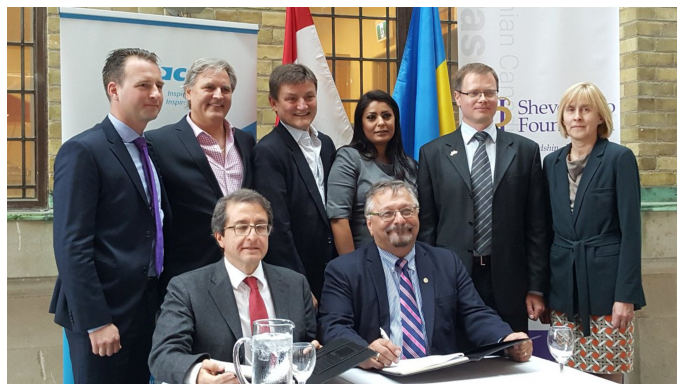

In [47]:
trumptrudeau = cv2.imread("trumptrudeau.jpg")
plt_show(trumptrudeau)

Detect faces with Watson Visual Recognition
- age
- face location
- gender
- identity

In [25]:
# import json
# # trumptrudeau_url = "https://upload.wikimedia.org/wikipedia/commons/7/76/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"
# trumptrudeau_url="https://pbs.twimg.com/media/DB5814aU0AA2_Wb.jpg"
# tt_resp = sdk_vr.detect_faces(parameters=json.dumps({'url': trumptrudeau_url}))
# pprint(tt_resp)

In [49]:
with open("trumptrudeau.jpg", "rb") as f:
    cf_resp = sdk_vr.classify(images_file=f)
    pprint(cf_resp.get_result())

{'custom_classes': 0,
 'images': [{'classifiers': [{'classes': [{'class': 'official',
                                           'score': 0.513,
                                           'type_hierarchy': '/person/official'},
                                          {'class': 'person', 'score': 0.681},
                                          {'class': 'diplomat',
                                           'score': 0.512,
                                           'type_hierarchy': '/person/diplomat'},
                                          {'class': 'adult person',
                                           'score': 0.503,
                                           'type_hierarchy': '/person/adult '
                                                             'person'},
                                          {'class': 'meeting',
                                           'score': 0.5,
                                           'type_hierarchy': '/person/meeting'},
           

#### Plot image result from Watson

In [26]:
def plt_watson_result(image, resp):
    temp = image
    
    #Loop through each face detected by Watson
    for i in range(0,len(resp['images'][0]['faces'])):
        face = resp['images'][0]['faces'][i]
        faceloc = face['face_location']
        x, y ,w, h = faceloc['left'], faceloc['top'], faceloc['width'], faceloc['height']
        cv2.rectangle(temp, (x,y), (x + w, y + h), (0, 255, 0), 3)

        #If Watson can identify the faces:
        try:
            identity = str(face['identity']['name'])
            cv2.putText(temp, 
                            str(identity), 
                            (x - 10, y - 10), cv2.FONT_HERSHEY_PLAIN,
                            2,
                            (0, 255, 0), thickness = 3,)
        except:
            pass

        #If Watson can identify the age
        try:
            age_min = str(face['age']['min'])
            cv2.putText(temp, 
                    str("Age:" + age_min + "-"), 
                    (x - 10, y - 50), cv2.FONT_HERSHEY_PLAIN,
                    2,
                    (0, 255, 0), thickness = 3,)
        except:
            pass

        #If Watson can identify the gender:
        try:
            gender = str(face['gender']['gender'])
            cv2.putText(temp, 
                    str(gender), 
                    (x - 10, y - 90), cv2.FONT_HERSHEY_PLAIN,
                    2,
                    (0, 255, 0), thickness = 3,)
        except:
            pass
    
    plt_show(temp)

In [27]:
# trumptrudeau = cv2.imread("trumptrudeau.jpg")
# plt_watson_result(trumptrudeau, tt_resp)

#### Oleksandr & Co

In [28]:
# #ENTER URL:
# image_url = "https://pbs.twimg.com/media/DB5814aU0AA2_Wb.jpg"

# #ENTER FILENAME
# filename = "myimage.jpg"

# urllib.request.urlretrieve(image_url, filename)
# myimage = cv2.imread(filename)
# plt_show(myimage)
# resp = sdk_vr.detect_faces(parameters=json.dumps({'url': image_url}))
# pprint(resp)
# plt_watson_result(myimage, resp)

## <font color=red> Try to classify an image from the internet

In [29]:
# Write your code here


Face on mars: 
https://upload.wikimedia.org/wikipedia/commons/3/38/Martian_face_viking.jpg

In [30]:
# #ENTER URL:
# image_url = "https://upload.wikimedia.org/wikipedia/commons/3/38/Martian_face_viking.jpg"
# #ENTER FILENAME
# filename = "myimage.jpg"

# urllib.request.urlretrieve(image_url, filename)
# myimage = cv2.imread(filename)
# plt_show(myimage)
# resp = sdk_vr.detect_faces(parameters=json.dumps({'url': image_url}))
# pprint(resp)
# plt_watson_result(myimage, resp)

### Classifying objects with Watson

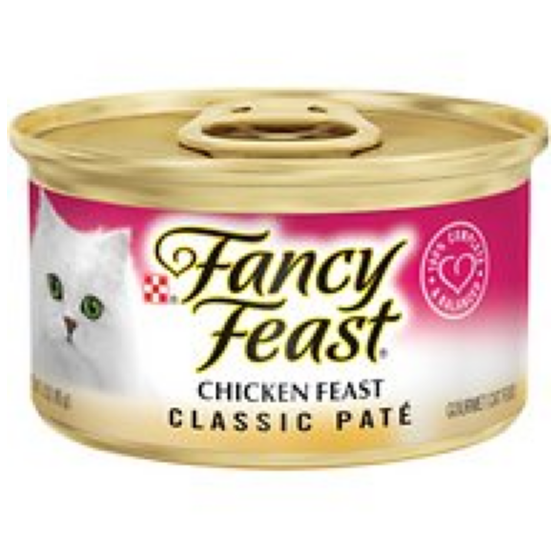

In [31]:
url = "https://img.chewy.com/is/catalog/76011_MAIN._AC_SS190_V1446845310_.jpg"
name = "catfood.jpg"

urllib.request.urlretrieve(url, name)

catfood = cv2.imread("catfood.jpg")

plt_show(catfood)

In [34]:
with open("catfood.jpg", "rb") as f:
    cf_resp = sdk_vr.classify(images_file=f)
    pprint(cf_resp.get_result())

{'custom_classes': 0,
 'images': [{'classifiers': [{'classes': [{'class': 'cat food',
                                           'score': 0.71,
                                           'type_hierarchy': '/food/feed/cat '
                                                             'food'},
                                          {'class': 'feed', 'score': 0.71},
                                          {'class': 'food', 'score': 0.843},
                                          {'class': 'CD-R',
                                           'score': 0.575,
                                           'type_hierarchy': '/memory '
                                                             'device/CD-R'},
                                          {'class': 'memory device',
                                           'score': 0.575},
                                          {'class': 'canned food',
                                           'score': 0.5,
                                 

### Image from webcam

#### Works if you run this notebook locally, otherwise it will produce an error (no webcam)

In [38]:
def get_webcam_image(width=500):
    #function to take a photo
    camera = cv2.VideoCapture(0)
    cv2.waitKey(1000) #wait 1000ms to allow camera to auto-adjust exposure
    retval, im = camera.read()
    return im

saycheese = get_webcam_image()

cv2.imwrite(filename = "webcam.jpg", img = saycheese) #save to file

True

#### Read webcam.jpg image from file

In [39]:
saycheese = cv2.imread(filename = "webcam.jpg") # upload image locally if you are on the cloud

In [48]:
with open("webcam.jpg", "rb") as f:
    cf_resp = sdk_vr.classify(images_file=f)
    pprint(cf_resp.get_result())

{'custom_classes': 0,
 'images': [{'classifiers': [{'classes': [{'class': 'plane seat',
                                           'score': 0.501,
                                           'type_hierarchy': '/support/seat/plane '
                                                             'seat'},
                                          {'class': 'seat', 'score': 0.501},
                                          {'class': 'support', 'score': 0.501},
                                          {'class': 'person', 'score': 0.5},
                                          {'class': 'room', 'score': 0.599},
                                          {'class': 'indigo color',
                                           'score': 0.742}],
                              'classifier_id': 'default',
                              'name': 'default'}],
             'image': 'webcam.jpg'}],
 'images_processed': 1}


In [46]:
# with open("webcam.jpg", "rb") as f:
#     resp = sdk_vr.detect_faces(f)
#     pprint(resp)
#     plt_watson_result(saycheese, resp)

#### Check out the model on the Watson Visual Recognition Tool
> [Watson Visual Recognition Tool](https://cocl.us/watsonvrtool) (GUI interface)

### For more tutorials on Watson Visual Recognition:
- [Watson Visual Recognition](https://cocl.us/watsonvr)
- [Watson Visual Recognition Full Documentation](https://cocl.us/A9SOS)
- [Watson Visual Recognition Tool](https://cocl.us/watsonvrtool) (GUI interface)
- [Watson tagging videos](https://cocl.us/darkvision)
- [Tutorial: Create a robot using Raspberry Pi that you can talk to and that can recognize your face](https://cocl.us/tjbot)
- [Tile Localization technique / code](https://github.com/IBM-Bluemix/Visual-Recognition-Tile-Localization)
- [Using Watson Visual Recognition to detect seafood fraud](https://devpost.com/software/dory)
